# Car Price Prediction

In [69]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

### Data Collection

In [13]:
car_dataset=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
# checking null values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [18]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Data Analysis and visualization

In [15]:
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [32]:
car_dataset['fuel'].value_counts()

fuel
1    2153
0    2123
2      40
3      23
4       1
Name: count, dtype: int64

In [31]:
car_dataset['seller_type'].value_counts()

seller_type
0    3244
1     994
2     102
Name: count, dtype: int64

In [30]:
car_dataset['transmission'].value_counts()

transmission
0    3892
1     448
Name: count, dtype: int64

In [29]:
car_dataset['owner'].value_counts()

owner
0    2832
1    1106
2     304
3      81
4      17
Name: count, dtype: int64

### Encoding the data

In [28]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [33]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [34]:
car_dataset['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

### Training and test Data

In [35]:
X=car_dataset.drop(['selling_price','name'],axis=1)
y=car_dataset['selling_price']

In [36]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1


In [37]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [42]:
X_test.shape

(434, 6)

In [43]:
y_train.shape

(3906,)

In [44]:
y_test.shape

(434,)

# Training the model

### Using linear Regression

In [45]:
model=LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

#### Model Evaluation

In [54]:
# On train Data
model_linear_train_prediction=model.predict(X_train)
error_score=metrics.r2_score(y_train,model_linear_train_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.43256302275062364


In [56]:
# On test Data
model_linear_test_prediction=model.predict(X_test)
error_score=metrics.r2_score(y_test,model_linear_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.5123159688209227


### Visualize the actual prices and the predicted Prices

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

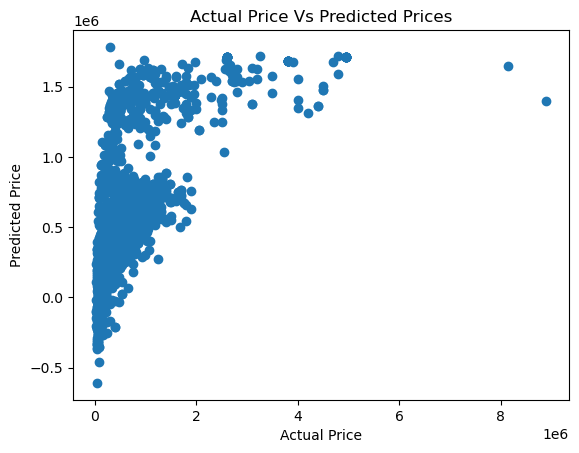

In [58]:
plt.scatter(y_train,model_linear_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

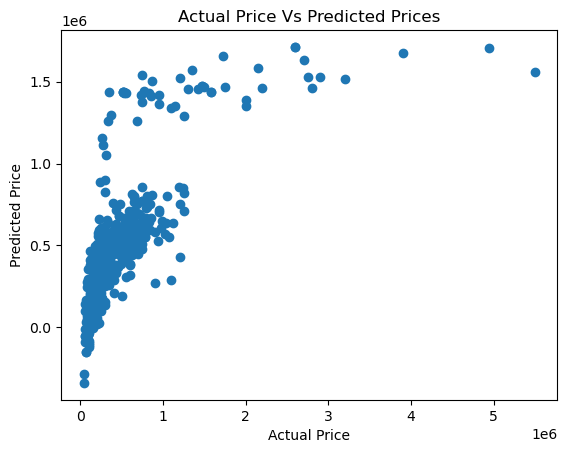

In [60]:
plt.scatter(y_test,model_linear_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')

### Using Lasso Regression

In [61]:
model_lasso=Lasso()

In [62]:
model_lasso.fit(X_train,y_train)

Lasso()

### Model Evaluation

In [65]:
# On train data

model_lasso_train_prediction=model_lasso.predict(X_train)
model_lasso_error_score=metrics.r2_score(y_train,model_lasso_train_prediction)
print("R squared Error : ",model_lasso_error_score)

R squared Error :  0.4325630226975419


In [66]:
# On test Data

model_lasso_test_prediction=model_lasso.predict(X_test)
model_lasso_test_error_score=metrics.r2_score(y_test,model_lasso_test_prediction)
print("R squared Error : ",model_lasso_test_error_score)

R squared Error :  0.512315270570078


### Visualization of actual Price and predicted Price

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

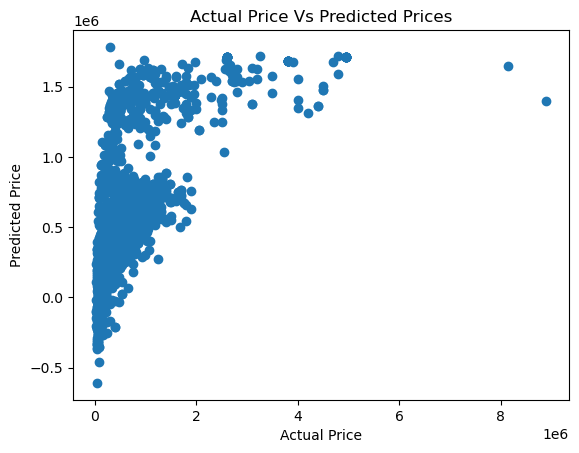

In [67]:
plt.scatter(y_train,model_lasso_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

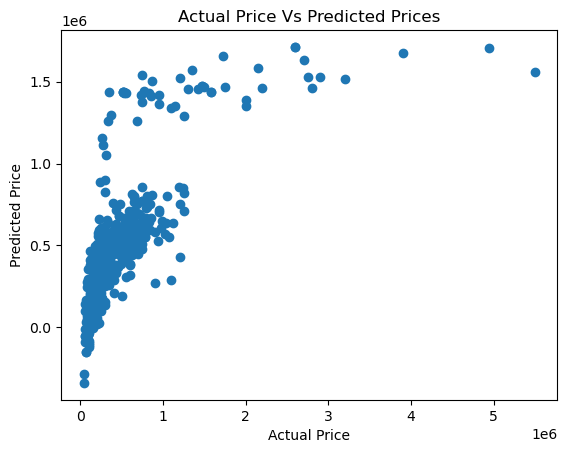

In [68]:
plt.scatter(y_test,model_lasso_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')

### Using XGBoost 

In [70]:
model_xgb=GradientBoostingRegressor()

In [71]:
model_xgb.fit(X_train,y_train)

GradientBoostingRegressor()

### Model Evaluation

In [76]:
# On train data
model_xgb_train_pred=model_xgb.predict(X_train)
model_xgb_train_error_score=metrics.r2_score(y_train,model_xgb_train_pred)
print("R squared Error : ",model_xgb_train_error_score)


R squared Error :  0.7267772276919306


In [74]:
# On train data
model_xgb_test_pred=model_xgb.predict(X_test)
model_xgb_test_error_score=metrics.r2_score(y_test,model_xgb_test_pred)
print("R squared Error : ",model_xgb_test_error_score)

R squared Error :  0.7203936133405068


### Visualization of actual price and predicted Price

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

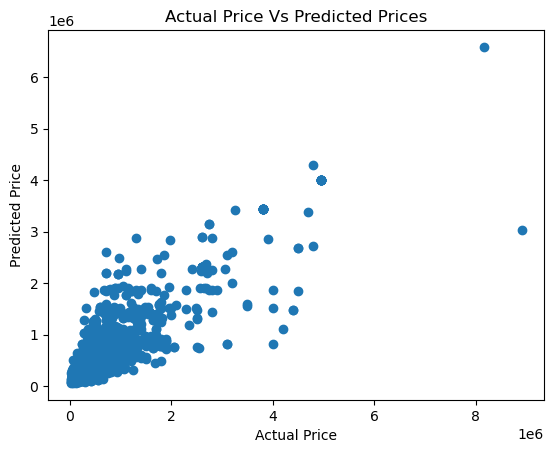

In [77]:
plt.scatter(y_train,model_xgb_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')

Text(0.5, 1.0, 'Actual Price Vs Predicted Prices')

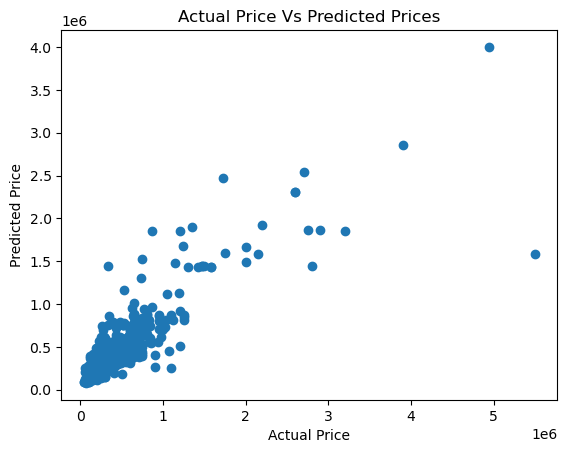

In [78]:
plt.scatter(y_test,model_xgb_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Prices')